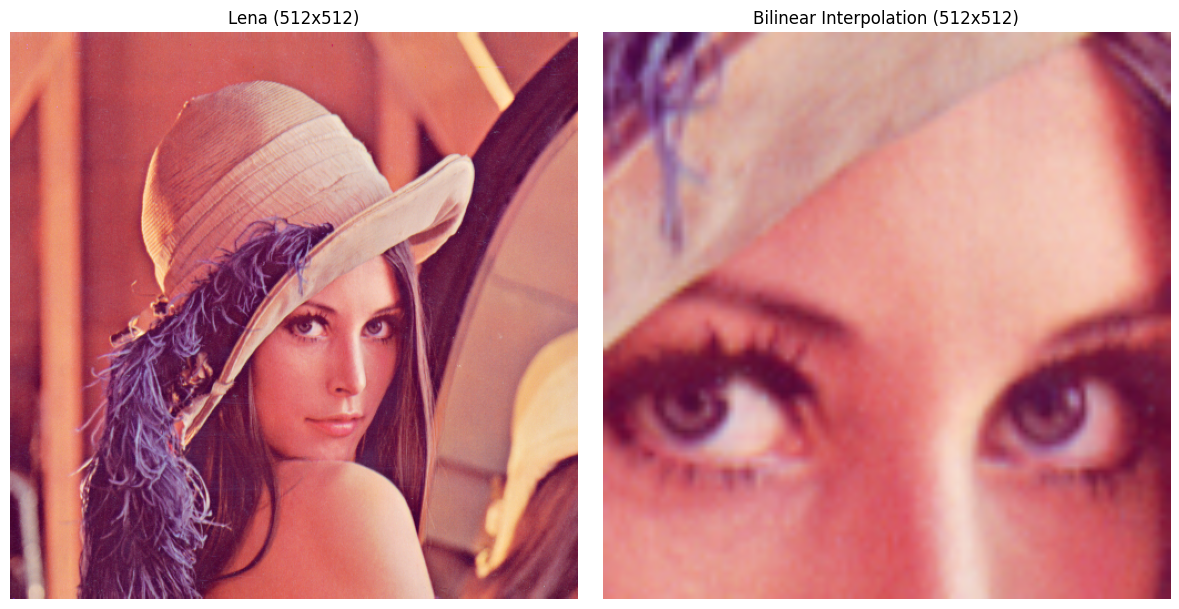

In [1]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Download the image
image_url = "https://www.hpca.ual.es/~vruiz/images/lena.png"
response = requests.get(image_url, stream=True)
response.raise_for_status()

# Save the image to a file
image_path = "lena_512x512_gray.png"
with open(image_path, 'wb') as out_file:
    out_file.write(response.content)

# Open the image using Pillow
img = Image.open(image_path)

# Convert the image to a numpy array for easy slicing
img_np = np.array(img)

# Define the tile boundaries (example: the face of Lena)
# These coordinates are approximate and can be adjusted
top = 200
bottom = 300
left = 250
right = 350

tile = img_np[top:bottom, left:right]

# 2. Display the images horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Display the original image in the first subplot
axes[0].imshow(img)
axes[0].set_title("Lena (512x512)")
axes[0].axis('off')

# Display the tile in the second subplot using bilinear interpolation
axes[1].imshow(tile, interpolation='bilinear')
axes[1].set_title("Bilinear Interpolation (512x512)")
axes[1].axis('off')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.savefig("../imgs/lena_bilinear.png", bbox_inches='tight')
plt.show()